#**Lab 3: Analyzing Data in Python**

# RPAD 676: Data Science for the Public Good

## Author:
## Date:

## Instructions
In this assignment, you will conduct your own analysis using the provided dataset. Follow the prompts in each section and write the necessary Python code to complete the tasks.

**Tasks:**
- Load and explore the dataset
- Perform basic data cleaning (handling missing values, etc.)
- Generate descriptive statistics
- Create at least one meaningful visualization
- Summarize key insights from your analysis

Remember to document your thought process in markdown cells throughout the notebook.

In [9]:
# Load necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file path)
data = pd.read_csv('digital_services_data.csv')  # Replace with actual dataset file

# Display the first few rows
data.head()

,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


## Descriptive Statistics

Compute and interpret basic statistics for the dataset:
- Mean, median, mode
- Standard deviation, min, max
- Any other relevant metrics

_Write your code below:_

In [10]:
# Descriptive Statistics #
print("Descriptive Statistics for Numeric Variables")
print(data.describe())

Descriptive Statistics for Numeric Variables
           user_id    TimeTaken  UserSatisfaction          Age  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean    500.500000  1059.025000          4.946000    49.039000   
std     288.819436   344.668741          2.901293    17.891998   
min       1.000000     0.000000          1.000000    18.000000   
25%     250.750000   830.500000          2.000000    34.000000   
50%     500.500000  1064.000000          5.000000    50.000000   
75%     750.250000  1274.000000          7.000000    64.000000   
max    1000.000000  2136.000000         10.000000    79.000000   

       DisabilityStatus  DigitalLiteracy   ErrorRates  RequestedHelp  \
count       1000.000000      1000.000000  1000.000000    1000.000000   
mean           0.153000         3.053000     2.387000       0.287000   
std            0.360168         1.397907     2.384726       0.452588   
min            0.000000         1.000000     0.000000       0.000000   


## Data Visualization

Create at least one visualization that highlights an interesting aspect of the dataset. You may use bar plots, histograms, scatter plots, or other relevant charts.

_Write your code below:_

Note that pie chart has different coding than bar chart and box plot.

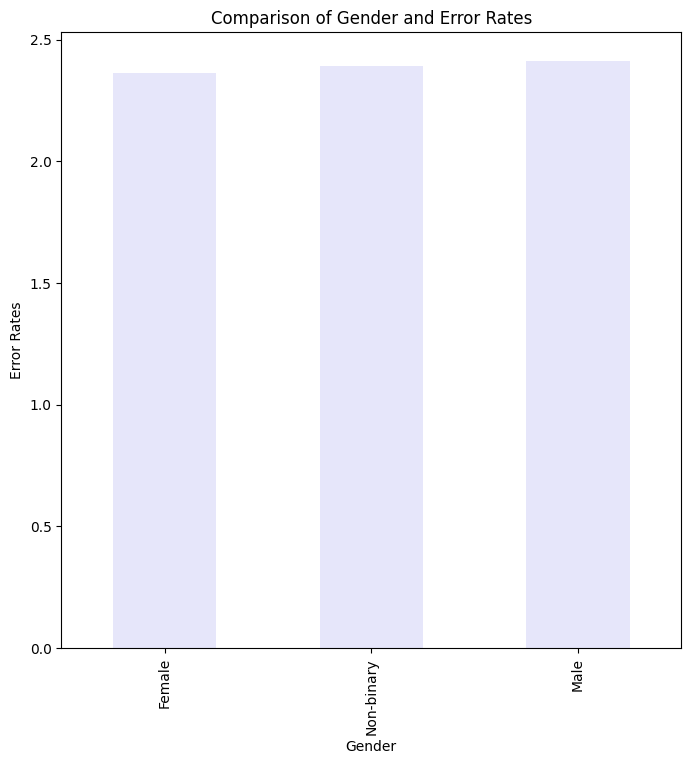

In [17]:
data.groupby('Gender')['ErrorRates'].mean().sort_values().plot(kind='bar', color='lavender', figsize=(8,8))
plt.xlabel("Gender")
plt.ylabel("Error Rates")
plt.title("Comparison of Gender and Error Rates")
plt.xticks(rotation=90)
plt.show()

## Inferential Statistics

### T-Tests
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [12]:
outcome_variable = 'UserSatisfaction'
categorical_variable = 'EmploymentStatus'

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of UserSatisfaction grouped by EmploymentStatus:
EmploymentStatus
Employed      4.86
Retired       4.87
Student       5.26
Unemployed    5.13
Name: UserSatisfaction, dtype: float64


In [13]:


t_stat, p_val = stats.ttest_ind(
    data[data['DisabilityStatus'] == 1]['TimeTaken'],
    data[data['DisabilityStatus'] == 0]['TimeTaken']
)
print(f"T-test: Effect of Disability on Time Taken (in Seconds), t-statistic={t_stat:.4f}, p-value={p_val:.4f}")


T-test: Effect of Disability on Time Taken (in Seconds), t-statistic=4.9169, p-value=0.0000


### ANOVA
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [15]:
outcome_variable = 'TimeTaken'  # Change to the variable of interest
categorical_variable = 'Agency'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)

aov = smf.ols(f'{outcome_variable} ~ C({categorical_variable})', data=data).fit()
anova_table = sm.stats.anova_lm(aov, typ=2)

print("\nANOVA Results:")
print(anova_table)


Mean of TimeTaken grouped by Agency:
Agency
Department of Education                     902.80
Department of Health and Human Services    1183.80
Department of Housing                      1033.89
Department of Public Safety                1119.40
Name: TimeTaken, dtype: float64

ANOVA Results:
                 sum_sq     df          F        PR(>F)
C(Agency)  1.083668e+07    3.0  33.361848  1.501558e-20
Residual   1.078411e+08  996.0        NaN           NaN


## Key Insights

Summarize your findings in a short paragraph. What patterns or trends did you observe? Were there any surprises in the data? How might these insights be useful?

_Write your response below:_

I was surprised to see that this data didn't have any strong correlations within the categories. For example, with error rates, there wasn't much variation between different categories.